In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/SKT-AI/KoBART#egg=kobart

  Cloning https://github.com/SKT-AI/KoBART to /tmp/pip-install-lktwz0oc/kobart_3fa7bacba442426da7c297a74f6b5523
  Running command git clone -q https://github.com/SKT-AI/KoBART /tmp/pip-install-lktwz0oc/kobart_3fa7bacba442426da7c297a74f6b5523
     |████████████████████████████████| 1.9 MB 12.0 MB/s 
     |████████████████████████████████| 776.8 MB 15 kB/s 
     |████████████████████████████████| 895 kB 82.0 MB/s 
     |████████████████████████████████| 3.3 MB 79.3 MB/s 
  Created wheel for kobart: filename=kobart-0.4-py3-none-any.whl size=8543 sha256=4bbce92cff802ea0a016ec0c3de1fa2cfed36fd36d10dd35b922608b72ab2664
  Stored in directory: /tmp/pip-ephem-wheel-cache-d240inni/wheels/6e/55/c4/bd4fede223bc304089ac8da2a2099a69db3fcd4b0e853383f5
Successfully built kobart
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take i

In [3]:
!python /content/drive/MyDrive/meeting/KoBART-summarization-main/download_binary.py

Download config.json
Downloading...
From: https://drive.google.com/uc?id=1H13loH6dS_2c2Z21kaBtgz42QsjkdAwO
To: /content/kobart_summary/config.json
100% 1.20k/1.20k [00:00<00:00, 2.25MB/s]
Download pytorch_model.bin
Downloading...
From: https://drive.google.com/uc?id=1D7BAXK_0faWW39c0ptE3FtROsVRbTNwI
To: /content/kobart_summary/pytorch_model.bin
100% 496M/496M [00:01<00:00, 375MB/s]


In [4]:
!bash /content/drive/MyDrive/meeting/KoBART-summarization-main/install_kobart.sh

  Cloning https://github.com/SKT-AI/KoBART to /tmp/pip-install-9l48nwwn/kobart_b742fa732813415c89095567de04e920
  Running command git clone -q https://github.com/SKT-AI/KoBART /tmp/pip-install-9l48nwwn/kobart_b742fa732813415c89095567de04e920


In [5]:
pip install -r /content/drive/MyDrive/meeting/KoBART-summarization-main/requirements.txt

     |████████████████████████████████| 831.4 MB 2.1 kB/s 
     |████████████████████████████████| 2.5 MB 81.7 MB/s 
     |████████████████████████████████| 813 kB 76.4 MB/s 
     |████████████████████████████████| 7.4 MB 86.0 MB/s 
     |████████████████████████████████| 829 kB 88.5 MB/s 
     |████████████████████████████████| 329 kB 72.7 MB/s 
     |████████████████████████████████| 636 kB 81.3 MB/s 
     |████████████████████████████████| 132 kB 92.7 MB/s 
     |████████████████████████████████| 180 kB 94.4 MB/s 
     |████████████████████████████████| 111 kB 91.0 MB/s 
     |████████████████████████████████| 4.3 MB 65.9 MB/s 
     |████████████████████████████████| 76 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 75.1 MB/s 
     |████████████████████████████████| 125 kB 91.8 MB/s 
     |████████████████████████████████| 790 kB 51.2 MB/s 
     |████████████████████████████████| 374 kB 61.7 MB/s 
     |████████████████████████████████| 192 kB 85.2 MB/s 
     |█████████

In [6]:
!python /content/drive/MyDrive/meeting/kobart_summary/train.py  --gradient_clip_val 1.0 --max_epochs 50 --default_root_dir /content/drive/MyDrive/meeting/logs  --gpus 1 --batch_size 4 --num_workers 4

Traceback (most recent call last):
  File "/content/drive/MyDrive/meeting/kobart_summary/train.py", line 6, in <module>
    import pytorch_lightning as pl
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/__init__.py", line 20, in <module>
    from pytorch_lightning import metrics  # noqa: E402
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/metrics/__init__.py", line 15, in <module>
    from pytorch_lightning.metrics.classification import (  # noqa: F401
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/metrics/classification/__init__.py", line 14, in <module>
    from pytorch_lightning.metrics.classification.accuracy import Accuracy  # noqa: F401
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/metrics/classification/accuracy.py", line 18, in <module>
    from pytorch_lightning.metrics.utils import deprecated_metrics
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/metrics/utils.py", line 29, in <module>
 

In [ ]:
!python /content/drive/MyDrive/meeting/KoBART-summarization-main/get_model_binary.py --hparams /content/drive/MyDrive/meeting/logs/tb_logs/default/version_14/hparams.yaml --model_binary /content/drive/MyDrive/meeting/model_chp/epoch=36-val_loss=0.001.ckpt

/content/drive/MyDrive/meeting/KoBART-summarization-main/get_model_binary.py:13: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  hparams = yaml.load(f)
using cached model
using cached model


In [ ]:
import torch
from kobart import get_kobart_tokenizer
from transformers.models.bart import BartForConditionalGeneration

def load_model():
    model = BartForConditionalGeneration.from_pretrained('./kobart_summary')
    return model

model = load_model()
tokenizer = get_kobart_tokenizer()

using cached model


In [ ]:
import pandas as pd
DIR = "/content/drive/MyDrive/meeting/"
train_df = pd.read_csv(DIR + 'train.csv')
test_df = pd.read_csv(DIR + 'test.csv')
submission = pd.read_csv(DIR + 'sample_submission.csv')

In [ ]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')

In [ ]:
def chinese_sentence(text):
    import re

    # 2단어 이상
    text = re.sub("의석을 정돈하여 주시기 바랍니다", "", text)
    text = re.sub("개의를 선포합니다", "", text)
    text = re.sub("먼저 의사팀장으로부터 의회 관련 사항에 대한 보고가 있겠습니다", "", text)
    text = re.sub("의사팀장은 보고하여 주시기 바랍니다", "", text)
    text = re.sub("의회관련 사항을 보고 드리겠습니다", "", text)
    text = re.sub("기타 자세한 내용은 배부해드린 유인물과 모니터 화면을 참조하여 주시기 바랍니다", "", text)
    text = re.sub("기타 자세한 사항은 모니터 자료를 참고하여 주시기 바랍니다", "", text)
    text = re.sub("자세한 내용은 배부해 드린 유인물을 참조하여 주시기 바랍니다", "", text)
    text = re.sub("의원 여러분 이의 있으십니까", "", text)
    text = re.sub("없습니다 하는 의원 있음", "", text)
    text = re.sub("이상으로 보고를 마치겠습니다", "", text)
    text = re.sub("이상 보고를 마치겠습니다", "", text)
    text = re.sub("먼저 의원발의 안건입니다", "", text)
    text = re.sub("의사팀장 수고하셨습니다", "", text)
    text = re.sub("의원여러분 수고 많으셨습니다", "", text)
    text = re.sub("산회를 선포합니다", "", text)
    text = re.sub("의회 관련 사항을 보고드리겠습니다", "", text)
    text = re.sub("없습니다  하는 의원 있음", "", text)
    text = re.sub("의원 여러분 이의 있습니까", "", text)
    text = re.sub("수고하셨습니다", "", text)
    text = re.sub("감사합니다", "", text)
    text = re.sub("이의 있습니까", "", text)
    text = re.sub("수고하여 주시기 바랍니다", "", text)

    text = re.sub("나오셔서 일괄 제안설명 해주시기 바랍니다", "", text)
    text = re.sub("안녕하십니까", "", text)
    text = re.sub("여러 의원님들께 깊은 감사의 말씀을 드립니다", "", text)
    text = re.sub("의장에게 보고하여 주시기 바랍니다", "", text)
    text = re.sub("의원 여러분", "", text)
    text = re.sub("먼저 의사팀장으로부터 의회 관련사항에 대한 보고가 있겠습니다", "", text)
    text = re.sub("그럼 두 분 의원님께서는 본 회기동안", "", text)
    text = re.sub("의원 여러분 수고 많으셨습니다", "", text)
    text = re.sub("수고 많으셨습니다", "", text)
    text = re.sub("보고 드리겠습니다", "", text)
    text = re.sub("보고하여 주시기 바랍니다", "", text)
    text = re.sub("의사보고가 있겠습니다", "", text)
    text = re.sub("심사결과를 보고하여 주시기 바랍니다", "", text)
    text = re.sub("의사담당 보고하여 주시기 바랍니다", "", text)
    text = re.sub("의사담당은 보고하여 주시기 바랍니다", "", text)
    text = re.sub("이상으로", "", text)
    text = re.sub("성원이 되었으므로", "", text)
    text = re.sub("다음은 의안접수 및 회부사항입니다", "", text)
    text = re.sub("본회의를 마치겠습니다", "", text)
    text = re.sub("수고 많이 하셨습니다", "", text)
    text = re.sub("기타 자세한 내용은 유인물로 참조하여 주시기 바랍니다", "", text)
    text = re.sub("그러면 두 분 의원님께서는 본 회기동안", "", text)
    text = re.sub("먼저 의사담당으로부터 집회요구 및 의안접수사항에 대한 보고가 있겠습니다", "", text)
    text = re.sub("의사담당", "", text)
    text = re.sub("먼저 집회에 관한 보고를 드리겠습니다", "", text)
    text = re.sub("먼저 의사팀장으로부터 의회관련 사항에 대한 보고가 있겠습니다", "", text)
    text = re.sub("기타 자세한 사항은 모니터 및 유인물을 참조하여 주시기 바랍니다", "", text)
    text = re.sub("의석을 정돈해 주시기 바랍니다", "", text)
    text = re.sub("의사팀장 나오셔서 보고해 주시기 바랍니다", "", text)
    text = re.sub("좌석을 정돈하여 주시기 바랍니다", "", text)
    text = re.sub("이번 회기중의 의사일정은 배부해 드린 유인물을 참고하여 주시기 바랍니다", "", text)
    text = re.sub("이의 없으십니까", "", text)
    text = re.sub("두 분 의원님께서는 본 회기동안", "", text)
    text = re.sub("이의있으십니까", "", text)
    text = re.sub("먼저 사무과장으로부터 보고가 있겠습니다", "", text)
    text = re.sub("보고를 마칩니다", "", text)
    text = re.sub("이의 없습니까", "", text)
    text = re.sub("이의 있으십니까", "", text)
    text = re.sub("의원 여러분", "", text)
    text = re.sub("먼저", "", text)
    text = re.sub("다음은", "", text)
    text = re.sub("그럼 두 분 의원님들께서는 본 회기동안", "", text)
    text = re.sub("그러면 두 분 의원님께서는 본 회기 동안", "", text)
    text = re.sub("그러면", "", text)
    text = re.sub("그러나", "", text)
    text = re.sub("그리고", "", text)
    text = re.sub("하지만", "", text)
    text = re.sub("그렇게", "", text)
    text = re.sub("또한", "", text)
    text = re.sub("기타 자세한 내용은 모니터 및 유인물을 참고하여 주시기 바랍니다", "", text)
    text = re.sub("이의가 없으므로", "", text)
    text = re.sub("회의 시작에 앞서 양해말씀을 드리겠습니다", "", text)
    text = re.sub("의안 접수 및 회부 사항입니다", "", text)
    
    text = re.sub("의견 없으십니까", "", text)
    text = re.sub("의견이 없으므로", "", text)
    text = re.sub("의견이 없으시면", "", text)
    text = re.sub("질의하실 의원님 계십니까", "", text)
    text = re.sub("고맙습니다", "", text)
    text = re.sub("감사합니다", "", text)
    text = re.sub("감사드립니다", "", text)
    text = re.sub("보고 드립니다", "", text)
    text = re.sub("생각합니다", "", text)
    text = re.sub("질의하실 의원님이 계시므로 질의 답변을 마치겠습니다", "", text)
    text = re.sub("질의하실 의원님이 계시므로", "", text)
    text = re.sub("모르겠습니다", "", text)
    text = re.sub("질의하여 주시기 바랍니다", "", text)
    text = re.sub("보고를 마치겠습니다", "", text)
    text = re.sub("보고드리겠습니다", "", text)
    text = re.sub("질의하여 주시기 바랍니다", "", text)
    text = re.sub("질의 답변을 마치겠습니다", "", text)
    text = re.sub("예", "", text)
    text = re.sub("이상입니다", "", text)
    text = re.sub("알겠습니다", "", text)
    text = re.sub("이상입니다", "", text)
    text = re.sub("마치겠습니다", "", text)
    text = re.sub("고생하셨습니다", "", text)

    text = re.sub("수고하십니다", "", text)
    text = re.sub("고생하십니다", "", text)

    text = re.sub("당부를 드리겠습니다", "", text)
    text = re.sub("부탁을 드리겠습니다", "", text)
    text = re.sub("질의드리겠습니다", "", text)
    text = re.sub("자료 설명하시느라고 고생 많으셨습니다", "", text)
    text = re.sub("의원님 여러분", "", text)

    text = re.sub("특히", "", text)
    text = re.sub("특히나", "", text)
    text = re.sub("그러다가", "", text)
    text = re.sub("더욱", "", text)
    text = re.sub("자료 준비하고 설명하시느냐고 수고 많으십니다", "", text)
    text = re.sub("마지막으로", "", text)
    text = re.sub("유인물을 참고하여 주시기 바랍니다", "", text)
    text = re.sub("지금부터", "", text)
    text = re.sub("별다른 의견이 없으십니까", "", text)
    text = re.sub("계속", "", text)
    text = re.sub("이의가 없으십니까", "", text)
    text = re.sub("이의가 없으신지요", "", text)
    text = re.sub("배부해 드린 유인물을 참조해 주시기 바랍니다", "", text)
    text = re.sub("자세한 내용은 배부하여드린 유인물을 참조하여 주시기 바랍니다", "", text)
    text = re.sub("이해해 주시기 바랍니다", "", text)
    text = re.sub("별다른 의견이 없으십니까", "", text)

    text = re.sub("의견이 없으십니까", "", text)
    text = re.sub("내용은 유인물을 참고해 주시기 바랍니다", "", text)
    text = re.sub("이해해 주시기 바랍니다", "", text)
    text = re.sub("별다른 의견이 없으십니까", "", text)

    return text


# 불필요한 텍스트 제거
def clean_text(title):
    title_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s.%]", " ", title)
    # title_clean = re.sub(" +", " ", title_clean)
    title_clean = title_clean.strip()
    return title_clean


def word_eda(title):
    # title = clean_text(title)
    title = chinese_sentence(title)
    # title = word_delete(title)
    return title

In [ ]:
import re
def preprocess(s):
    s = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\s\d]', ' ',s)
    return s

train_df['context'] = train_df['context'].apply(preprocess)

test_df['context'] = test_df['context'].apply(preprocess)

In [ ]:
import re
train_df["context"] = train_df["context"].apply(word_eda)
test_df["context"] = test_df["context"].apply(word_eda)

In [ ]:
stop_df = pd.read_csv(DIR + '한국어불용어100.txt',sep = '\t', header = None, names = ['형태','품사','비율'])
stopword = []
for i in range(len(stop_df)):
    stopword.append(stop_df['형태'][i])

In [ ]:
import nltk
nltk.download('punkt')
for i, document in enumerate(test_df["context"]):
    clean_words = [] 
    for word in nltk.tokenize.word_tokenize(document): 
        if word not in stopword: #불용어 제거
            clean_words.append(word)
    test_df["context"][i] = ' '.join(clean_words) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('punkt')
stopwords = ['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '니다']
for i, document in enumerate(test_df["context"]):
    clean_words = [] 
    for word in nltk.tokenize.word_tokenize(document): 
        if word not in stopwords: #불용어 제거
            clean_words.append(word)
    test_df["context"][i] = ' '.join(clean_words) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
test_df['context'][4]

'의사일정 제4항 환경분야 현지확인 특별위원회 구성결의안을 상정합니다 대표발의하신 이대웅 의원님께서는 나오셔서 특별위원회 구성안에 대하여 제안설명하여 주시기 바랍니다 제235회 제1차 정례회 제1차 본회의를 맞이하여 음성군 환경분야 현지확인을 발의하여 제안하게 되었습니다 제안이유는 주요 환경 분야의 현황 및 실태를 현지확인하여 제반 문제를 확인 개선토록 하고 기업체와 지역주민에게 환경에 대한 중요성을 인식시켜 깨끗하고 쾌적한 환경을 만들어 군민의 삶의 질을 높이고자 함입니다 추진방향에 대해 말씀드리겠습니다 현지확인 기간은 6월 27일부터 6월 28일까지 이틀 동안이며 음성하수종말처리장 구제역 매립지 오갑천 생태하천조성사업 금왕산단 폐수처리장 쓰레기 매립장 고려그린 음성축산물유통단지 삼성시장 부산물판매장 8곳을 확인하겠습니다 기타 사항은 유인물로 갈음하오니 양해하여 주시기 바라며 현지확인에 대한 결과보고는 제237회 임시회 본회의 시 하도록 하겠습니다 세부 자세한 일정은 지난 의원 간담회 시 사전 협의하신 대로 일정을 계획하였으며 필요 시 현지 여건을 고려하여 일정을 조정하도록 하겠습니다 현지확인 시 의원님들께서는 문제점과 개선할 등을 발굴하여 주시기 바랍니다 모쪼록 본 계획안을 께서 만장일치로 의결하여 주시길 당부 드리며 환경분야 현지확인 계획안에 대한 제안설명을 마치도록 하겠습니다 이대웅 의원님 방금 이대웅 의원님으로부터 제안설명을 들으신 바와 같이 7분의 의원님으로 위원회를 구성하여 6월 27일부터 28일까지 이틀 동안 환경분야 현지확인 활동을 하도록 하겠습니다 특별위원회 위원은 제가 지명하도록 하겠습니다 환경분야 현지확인 특별위원회 위원으로는 손수종 의원님 이한철 의원님 남궁유 의원님 조천희 의원님 손달섭 의원님 이대웅 의원님 김순옥 의원님으로 구성하도록 하겠습니다 본 특별위원회 구성결의안을 원안대로 의결하고자 하는데 환경분야 현지확인 특별위원회 구성결의안은 가결되었음을 선포합니다'

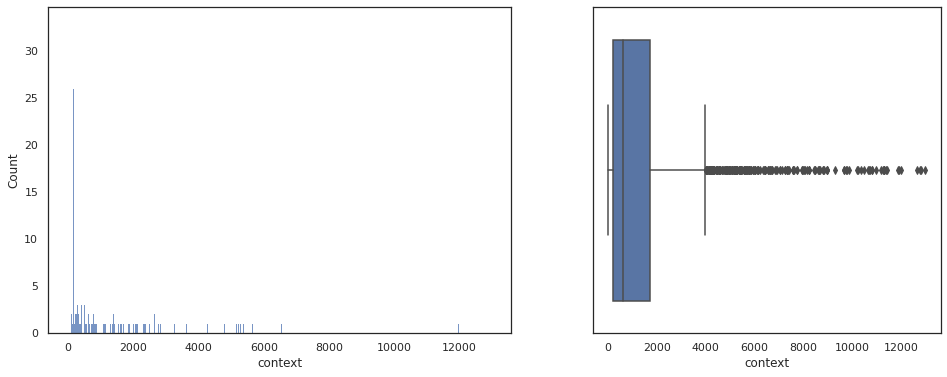

In [ ]:
# sentence
original_sent_counts = train_df['context'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])

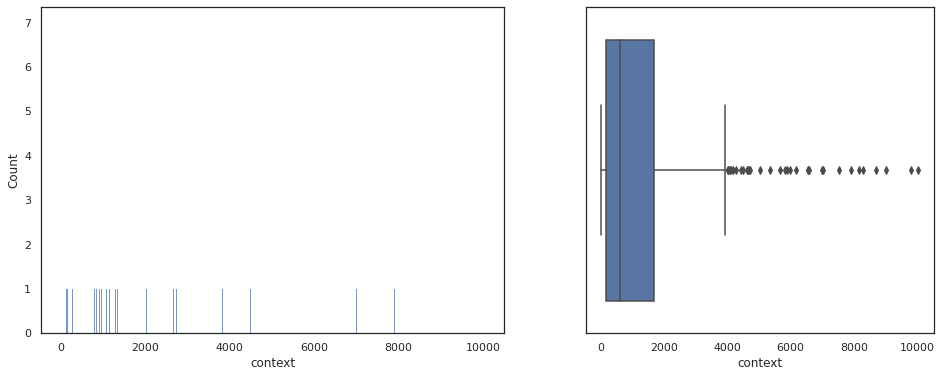

In [ ]:
# sentence
original_sent_counts = test_df['context'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])

In [ ]:
text = test_df['context'][4][:2100]

In [ ]:
input_ids = tokenizer.encode(text)
input_ids = torch.tensor(input_ids)
input_ids = input_ids.unsqueeze(0)

# param들을 적당히 잘 조정해 보자.
output = model.generate(
    input_ids, 
    eos_token_id=1, 
    min_length=30, 
    max_length=1024,
    num_beams=5,
    #do_sample=True,
    #early_stopping=True, 
    #length_penalty=0.8,
    #no_repeat_ngram_size=5, 
    #temperature = 0.7,
    num_return_sequences=3,
    repetition_penalty=10.0,
    #top_p=0.9,
)

output = tokenizer.decode(output[0], skip_special_tokens=True)

In [ ]:
# fine-tuning을 좀 더 시켜주면, 더 성능이 좋을 것 같군요...
print('[입력 Text]', '\n', text)
print()
print('[요약 Text]', '\n', output)

[입력 Text] 
 의사일정 제4항 환경분야 현지확인 특별위원회 구성결의안을 상정합니다 대표발의하신 이대웅 의원님께서는 나오셔서 특별위원회 구성안에 대하여 제안설명하여 주시기 바랍니다 제235회 제1차 정례회 제1차 본회의를 맞이하여 음성군 환경분야 현지확인을 발의하여 제안하게 되었습니다 제안이유는 주요 환경 분야의 현황 및 실태를 현지확인하여 제반 문제를 확인 개선토록 하고 기업체와 지역주민에게 환경에 대한 중요성을 인식시켜 깨끗하고 쾌적한 환경을 만들어 군민의 삶의 질을 높이고자 함입니다 추진방향에 대해 말씀드리겠습니다 현지확인 기간은 6월 27일부터 6월 28일까지 이틀 동안이며 음성하수종말처리장 구제역 매립지 오갑천 생태하천조성사업 금왕산단 폐수처리장 쓰레기 매립장 고려그린 음성축산물유통단지 삼성시장 부산물판매장 8곳을 확인하겠습니다 기타 사항은 유인물로 갈음하오니 양해하여 주시기 바라며 현지확인에 대한 결과보고는 제237회 임시회 본회의 시 하도록 하겠습니다 세부 자세한 일정은 지난 의원 간담회 시 사전 협의하신 대로 일정을 계획하였으며 필요 시 현지 여건을 고려하여 일정을 조정하도록 하겠습니다 현지확인 시 의원님들께서는 문제점과 개선할 등을 발굴하여 주시기 바랍니다 모쪼록 본 계획안을 께서 만장일치로 의결하여 주시길 당부 드리며 환경분야 현지확인 계획안에 대한 제안설명을 마치도록 하겠습니다 이대웅 의원님 방금 이대웅 의원님으로부터 제안설명을 들으신 바와 같이 7분의 의원님으로 위원회를 구성하여 6월 27일부터 28일까지 이틀 동안 환경분야 현지확인 활동을 하도록 하겠습니다 특별위원회 위원은 제가 지명하도록 하겠습니다 환경분야 현지확인 특별위원회 위원으로는 손수종 의원님 이한철 의원님 남궁유 의원님 조천희 의원님 손달섭 의원님 이대웅 의원님 김순옥 의원님으로 구성하도록 하겠습니다 본 특별위원회 구성결의안을 원안대로 의결하고자 하는데 환경분야 현지확인 특별위원회 구성결의안은 가결되었음을 선포합니다

[요약 Text] 
 환경분야 현지확인 특별위원회는 

In [ ]:
for i in range(len(test_df['context'])):
    text = test_df['context'][i][:2050]
    input_ids = tokenizer.encode(text)
    input_ids = torch.tensor(input_ids)
    input_ids = input_ids.unsqueeze(0)

    output = model.generate(
    input_ids, 
    eos_token_id=1, 
    min_length=30, 
    max_length=512, 
    num_beams=5,
    #do_sample=True,
    early_stopping=True, 
    length_penalty=0.8,
    no_repeat_ngram_size=5, 
    temperature = 0.7,
    num_return_sequences=2,
    repetition_penalty=12.0,
    #top_p=0.9,
  )

    output = tokenizer.decode(output[0], skip_special_tokens=True)
    submission['summary'][i] = output

In [ ]:
submission.to_csv(DIR + 'kobart_final.csv', index=False)

In [ ]:
submission['summary'][2]

'제235회 제1차 정례회 회의록 서명의원으로 조천희 의원, 손달섭 의원이 선출됨. 또한 조천희 의원,손달섭 의원이 음성군의회 의원으로 선출됨.'

In [ ]:
test_df['context'][2]

'의사일정 제2항 회의록 서명의원 선출의 건을 상정합니다 제235회 제1차 정례회 회의록 서명의원으로는 의원님들이 사전에 양해하여 주신대로 조천희 의원님 손달섭 의원님을 선출하고자 하는데 조천희 의원님 손달섭 의원님이 회의록 서명의원으로 선출되었음을 선포합니다 분 의원님께서는'

In [ ]:
# import pandas as pd
# train = pd.read_csv('/content/drive/MyDrive/meeting/train.csv')

# train_df = train[:2396]
# test_df = train[2396:]

# train_df.to_csv('/content/drive/MyDrive/meeting/KoBART-summarization-main/data/train.csv', index=False)
# test_df.to_csv('/content/drive/MyDrive/meeting/KoBART-summarization-main/data/test.csv', index=False)